# Abstract Factory​

### Problem & Goal

**Abstract Factory** lets to produce *families of related objects* without specifying their concrete classes.​

Imagine that you’re creating a furniture shop simulator. ​

Your code consists of classes that represent:​
* A family of related products, say: *Chair + Sofa + CoffeeTable*.​
* Several variants of this family. ​

For example, products Chair + Sofa + CoffeeTable are available in these variants: *Modern, Victorian, ArtDeco*.​

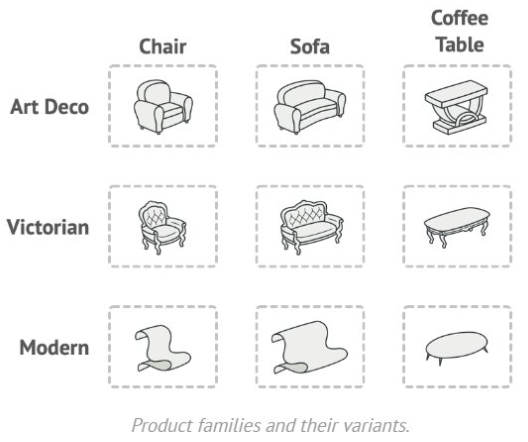

You need a way to create `individual furniture objects so that they match other objects of the same family`.

You `don’t want to change existing code when adding new products or families of products` to the program.

### Simple Solution

Factory pattern suggests is to explicitly declare interfaces for each distinct product of the product family (e.g., chair, sofa or coffee table). ​

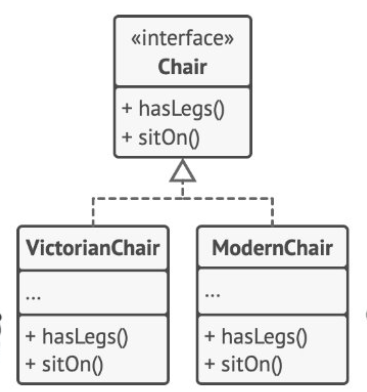

In [3]:
from abc import ABC, abstractmethod

Each distinct product of a product family should have a base interface. 
All variants of the product must implement this interface

In [5]:
class Chair(ABC):
    @abstractmethod
    def hasLegs(self) -> str:
        pass

In [6]:
class VictorianChair(Chair):
    def hasLegs(self) -> str:
        return f"I have Victorian type of legs"

In [7]:
class ModernChair(Chair):
    def hasLegs(self) -> str:
        return f"I have Modern type of legs"

In [31]:
mc=ModernChair()
mc.hasLegs()

'I have Modern type of legs'

The next move is to `declare the Abstract Factory`—an interface with a list of creation methods for all products that are part of the product family (for example, *createChair, createSofa* and *createCoffeeTable*). ​

These methods must return abstract product types represented by the interfaces we extracted previously: *Chair, Sofa, CoffeeTable* and so on.​

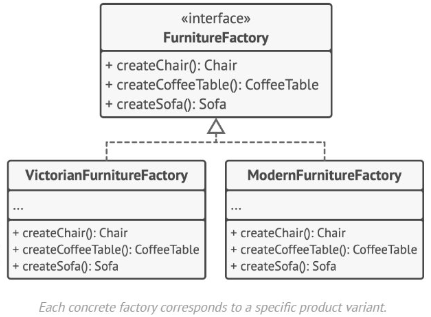

We can’t use a Python variable unless we know what type of object it refers to at the moment—how would we know what we can do with it?

Since we need to be aware of the types we are using at any point in our code, it is good practise to document this. In this course, we will document the types of all functions and class instance attributes. We’ll use **Python’s type annotation syntax** to do so.

https://docs.python.org/3/library/typing.html#the-type-of-class-objects

The *Abstract Factory interface* declares a set of methods that `return different abstract products`. These products are called a family and are related by a high-level theme or concept. 
Products of one family are usually able to collaborate among themselves. 
A family of products may have several variants, but the products of one variant are incompatible with products of another.

In [8]:
class FurnitureFactory(ABC):
    @abstractmethod
    def createChair() -> Chair:
        pass
    
    

*Concrete Factories* produce a family of products that belong to a single variant. 
The factory guarantees that resulting products are compatible. 
Note that signatures of the Concrete Factory's methods return an abstract product, while inside the method a concrete product is instantiated.

In [51]:
class VictorianFurnitureFactory(FurnitureFactory):
    def createChair(self) -> Chair:
        print("I am making the Victorian Chair...")
        return VictorianChair()

Each Concrete Factory has a corresponding product variant.

In [46]:
class ModernFurnitureFactory(FurnitureFactory):
    def createChair(self) -> Chair:
        return ModernChair()

The client code works with factories and products only through abstract types: FurnitureFactory and Chair. This lets you pass any factory or product subclass to the client code without breaking it.

In [47]:
from typing import Type

In [54]:
def client_code(factory: Type[FurnitureFactory]) -> None:
    hannaChair=factory.createChair()
    print(hannaChair.hasLegs())

The client code can work with any concrete factory class.

In [55]:
client_code(VictorianFurnitureFactory())

I am making the Victorian Chair...
I have Victorian type of legs


Here's the the base interface of another product. 
All products can interact with each other, but proper interaction is possible only between products of  the same concrete variant.

In [58]:
class CoffeeTable(ABC):
    @abstractmethod
    def putOn(self) -> None:
        pass
    
    def makeComposition(self, collaborator: Type[Chair]) -> None:
        pass

In [64]:
class VictorianCoffeeTable(CoffeeTable):
    def putOn(self) -> str:
        return f"Place something on the Victorian Coffee Table"
    
    def makeComposition(self, collaborator: Type[Chair]) -> str:
        result=collaborator.hasLegs()
        return f"The result of the VictorianCoffeeTable collaboration with the {result}"

In [61]:
class FurnitureFactory1(ABC):
    @abstractmethod
    def createChair() -> Chair:
        pass
    
    def createTable() -> CoffeeTable:
        pass

In [63]:
class VictorianFurnitureFactory1(FurnitureFactory1):
    def createChair(self) -> Chair:
        print("I am making the Victorian Chair...")
        return VictorianChair()
    
    def createTable(self) -> CoffeeTable:
        print("I am making the Victorian Coffee Table...")
        return VictorianCoffeeTable()

In [68]:
def client_code1(factory: Type[FurnitureFactory1]) -> None:
    hannaChair=factory.createChair()
    hannaTable=factory.createTable()
    print(hannaTable.makeComposition(hannaChair))

In [69]:
client_code1(VictorianFurnitureFactory1())

I am making the Victorian Chair...
I am making the Victorian Coffee Table...
The result of the VictorianCoffeeTable collaboration with the I have Victorian type of legs


### Advanced Solution

Abstract Factory UML Diagram

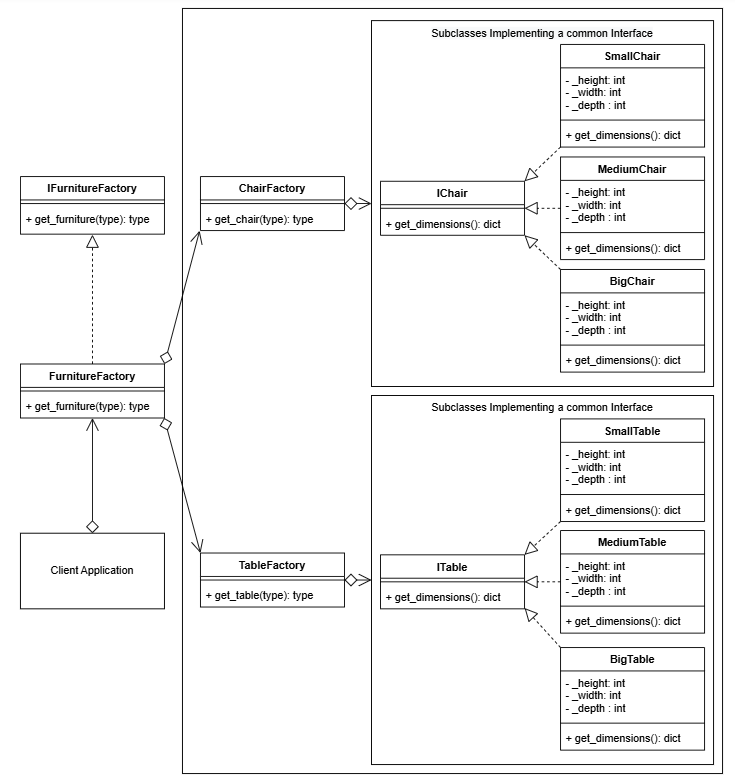

In [1]:
#import sys
#del sys.modules['FurnitureAbstractfactory.client']
from FurnitureAbstractfactory.client import getHannaFurniture

getHannaFurniture()

!!!!
smallchair
bigtable
mediumtable
Table Not Found
Hanna has 2 items
Hanna's furniture includes the <class 'FurnitureAbstractfactory.SmallChairClass.SmallChair'> with {'width': 40, 'depth': 40, 'height': 40}
Hanna's furniture includes the <class 'FurnitureAbstractfactory.BigTableClass.BigTable'> with {'width': 150, 'depth': 50, 'height': 70}


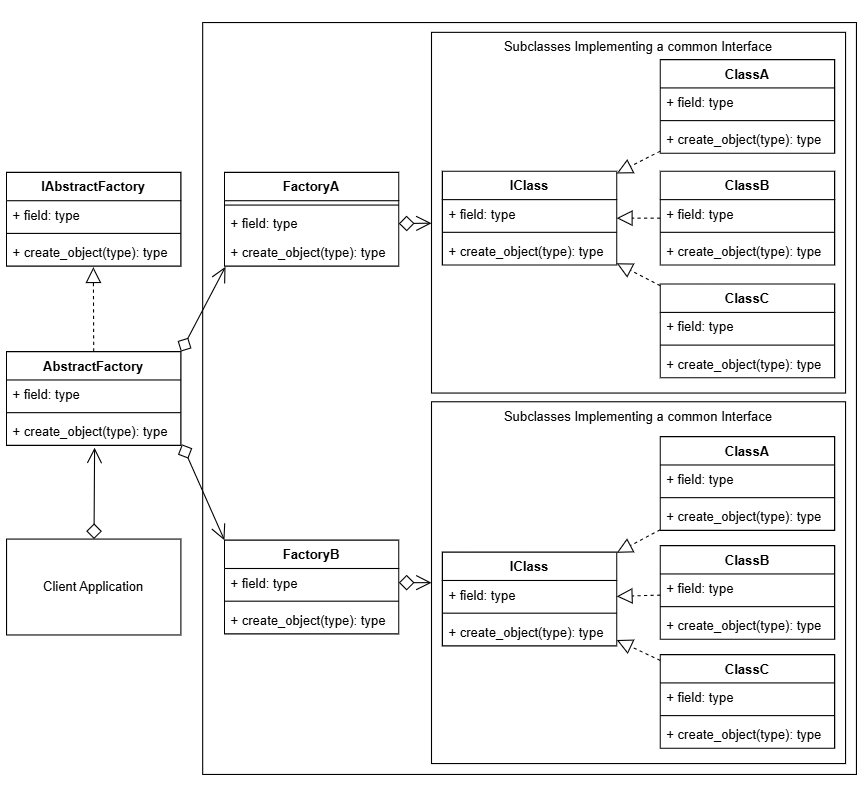

https://sbcode.net/python/abstract_factory/